In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from Levenshtein import Levenshtein as lev

In [2]:
f_name = "tripadvisor_review.txt"

data = np.loadtxt(f_name, dtype="str", delimiter="\t\t\t")

In [3]:
result = pd.DataFrame(columns=['i', 'j', 'text 1', 'text 2', 'distance', 'ratio'])

In [4]:
for i, ith_item in enumerate(data[0:100]):
    for j, jth_item in enumerate(data[i+1:100]):
        l = lev(ith_item, jth_item)
        res = l.run()
        result = result.append({'i': i, 'j': i+j+1, 'text 1': ith_item, 'text 2': jth_item, 'distance': res["distance"], 'ratio': res["ratio"]}, ignore_index=True)

In [5]:
df = result

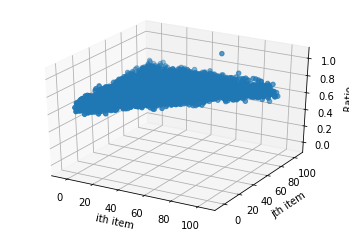

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['i'].values, df['j'].values, df['ratio'].values)
ax.set_xlim(-10, 110)
ax.set_ylim(-10, 110)
ax.set_zlim(-0.1, 1.1)
ax.set_xlabel('ith item')
ax.set_ylabel('jth item')
ax.set_zlabel('Ratio')
plt.show()